In [1]:
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
def myROC(result_df, target, color,label=None,asc=False,alpha=1,size=2):
    condition_positive = result_df.iT.sum()
    condition_negative = (~result_df.iT.astype(bool)).astype(int).sum()

    doof = result_df.sort_values(by = [target], ascending=asc ).copy()
    doof['TPr'] = doof.iT.cumsum() / condition_positive
    doof['FPr'] = (~doof.iT.astype(bool)).astype(int).cumsum() / condition_negative
    roc_fool = doof[['iT',target]].dropna()
    rocscore = roc_auc_score(y_true = roc_fool.iT.values , 
                                y_score = roc_fool[target].values)
        
    if not label:
        label=target+" {}".format(rocscore)
    else:
        print(label, rocscore)
    
    x = doof.FPr.values
    y = doof.TPr.values
    ax.plot(x,y, color=color, label=label, 
            linewidth=size, alpha=alpha)

In [3]:
def hackyload(fp):
    uff = pd.read_csv(fp, sep='\t')
    uff['nimrod'] = uff.logits_1 - uff.logits_0
    uff['iT'] = np.argmax(uff.loc[:,['labels_0','labels_1']].values, axis=1)
    return uff

In [4]:
colors = sns.color_palette("colorblind", 8)

In [5]:
bsmsw1 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe100_bsm10.csv"
bsmsw2 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe100_bsm20.csv"
bsmsw3 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe100_bsm40.csv"
bsmsw4 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe100_bsm5.csv"

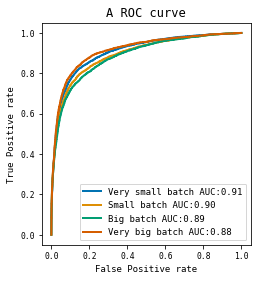

In [6]:
outname='tfigure_batchsize'

Fwidth = THESIS_PAGEWIDTH*0.7
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.13, right=.99, top=.99)

# ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(hackyload(bsmsw1,), 'nimrod',color = colors[0])
myROC(hackyload(bsmsw2,), 'nimrod',color = colors[1])
myROC(hackyload(bsmsw3,), 'nimrod',color = colors[2])
myROC(hackyload(bsmsw4,), 'nimrod',color = colors[3])

plt.title('A ROC curve')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# replace labels
new_labels = ['Very small batch AUC:0.91',
             'Small batch AUC:0.90',
             'Big batch AUC:0.89',
             'Very big batch AUC:0.88']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

In [7]:
bsmsw1 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe5_bsm5.csv"
bsmsw2 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe25_bsm5.csv"
bsmsw3 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe100_bsm5.csv"
bsmsw4 = "/home/ska/panos/Thesis_shallow/data/nimrod_results/training_sweeps/nimrod_training_sweep_M1957_hg19_dexe1000_bsm5.csv"

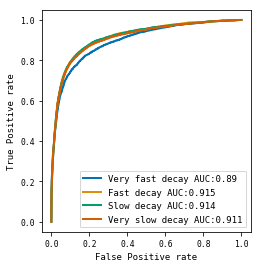

In [8]:
outname='tfigure_LRDecay'

Fwidth = THESIS_PAGEWIDTH*0.7
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.13, right=.99, top=.99)

# ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(hackyload(bsmsw1,), 'nimrod',color = colors[0])
myROC(hackyload(bsmsw2,), 'nimrod',color = colors[1])
myROC(hackyload(bsmsw3,), 'nimrod',color = colors[2])
myROC(hackyload(bsmsw4,), 'nimrod',color = colors[3])

# plt.title('A ROC curve')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# replace labels
new_labels = ['Very fast decay AUC:0.89',
             'Fast decay AUC:0.915',
             'Slow decay AUC:0.914',
             'Very slow decay AUC:0.911']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

In [9]:
def load_nimrod_results(fp):
    n = pd.read_csv(fp,sep='\t')
    n['iT'] = np.argmax(n[['labels_0','labels_1']].values, axis=1)
    n['nimrod'] = n['logits_1'] - n['logits_0']
    return n

In [10]:
nimrod_hg_self = load_nimrod_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/test_M2321_keratino_dexe10_bsm8_self.csv")
nimrod_hg_cross = load_nimrod_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/test_M2321_keratino_dexe10_bsm8_onZebra.csv")
nimrod_dr_self = load_nimrod_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/test_M2321_zebra_dexe50_bsm7_self.csv")
nimrod_dr_cross = load_nimrod_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/test_M2321_zebra_dexe50_bsm7_onKeratino.csv")

In [11]:
[roc_auc_score(y_true=nimrod_hg_self.iT, y_score=nimrod_hg_self.nimrod),
 roc_auc_score(y_true=nimrod_hg_cross.iT, y_score=nimrod_hg_cross.nimrod),
 roc_auc_score(y_true=nimrod_dr_self.iT, y_score=nimrod_dr_self.nimrod),
 roc_auc_score(y_true=nimrod_dr_cross.iT, y_score=nimrod_dr_cross.nimrod)]

[0.93706525939688157,
 0.81350805763366119,
 0.9334960120801149,
 0.84316175873502253]

In [12]:
piqdf_dr = pd.read_csv("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/M2321_zebra_test_PIQ.tsv",sep='\t')
piqdf_hg = pd.read_csv("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/M2321_keratino_test_PIQ.tsv",sep='\t')

In [13]:
roc_auc_score(y_true=piqdf_dr.iT, y_score=piqdf_dr.piq_score)

0.67455547837454977

In [14]:
def load_tfimp_results(fp):
    df = pd.read_csv(fp,sep='\t',header=None)
    df.columns = ['iT','tfimp']
    return df

In [15]:
tfimp_hg_self = load_tfimp_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/p63_M2321_keratino_model0_selftest")
tfimp_hg_cross = load_tfimp_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/p63_M2321_keratino_model0_zebratest")
tfimp_dr_self = load_tfimp_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/p63_M2321_zebra_model0_selftest")
tfimp_dr_cross = load_tfimp_results("/home/ska/panos/Thesis_shallow/data/nimrod_results/p63/p63_M2321_zebra_model0_keratinotest")

In [16]:
[roc_auc_score(y_true=tfimp_hg_self.iT, y_score=tfimp_hg_self.tfimp),
 roc_auc_score(y_true=tfimp_hg_cross.iT, y_score=tfimp_hg_cross.tfimp),
 roc_auc_score(y_true=tfimp_dr_self.iT, y_score=tfimp_dr_self.tfimp),
 roc_auc_score(y_true=tfimp_dr_cross.iT, y_score=tfimp_dr_cross.tfimp)]

[0.83311827073311284,
 0.7642253683553708,
 0.84936619445790518,
 0.83589988856505237]

In [17]:
test_hg_w = pd.read_csv("/home/ska/panos/Thesis_shallow/data/nimrod_results/others/M1957_hgstages_test_wellington.tsv",sep='\t',index_col=0)
test_mm_w = pd.read_csv("/home/ska/panos/Thesis_shallow/data/nimrod_results/others/M1957_mm10stages_test_wellington.tsv",sep='\t',index_col=0)

In [18]:
Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

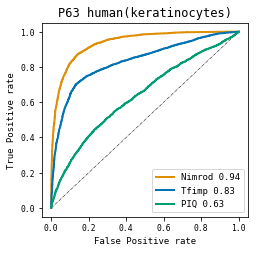

In [19]:
outname='tfigure_rocP63_keratino'

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(nimrod_hg_self ,'nimrod',color = colors[1])
myROC(tfimp_hg_self, 'tfimp',color = colors[0])
myROC(piqdf_hg, 'piq_score',color = colors[2])

plt.title('P63 human(keratinocytes)')

lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]
# # replace labels
new_labels = ['Nimrod 0.94',
              'Tfimp 0.83',
              'PIQ 0.63'              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

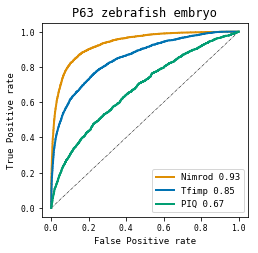

In [20]:
outname='tfigure_rocP63_zebra'

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)
ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

myROC(nimrod_dr_self ,'nimrod',color = colors[1])
myROC(tfimp_dr_self, 'tfimp',color = colors[0])
myROC(piqdf_dr, 'piq_score',color = colors[2])

plt.title('P63 zebrafish embryo')
lgnd = plt.legend(loc='lower right')

lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]

new_labels = ['Nimrod 0.93',
              'Tfimp 0.85',
              'PIQ 0.67'              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

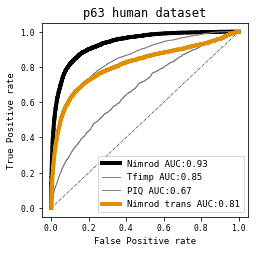

In [21]:
outname='tfigure_NEWct_P63_hg'

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

myROC(nimrod_dr_self ,'nimrod',color = 'black',size=4)
myROC(tfimp_dr_self, 'tfimp',color = 'grey',size=1)
myROC(piqdf_dr, 'piq_score',color = 'grey',size=1)
myROC(nimrod_hg_cross, 'nimrod',color = colors[1],size=4)

plt.title('p63 human dataset')
lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]

new_labels = ['Nimrod AUC:0.93',
              'Tfimp AUC:0.85',
              'PIQ AUC:0.67',
              'Nimrod trans AUC:0.81',           
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

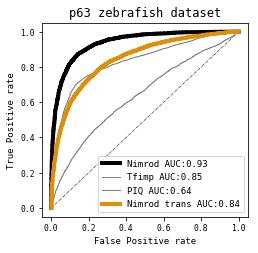

In [22]:
outname='tfigure_NEWct_P63_dre'

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(nimrod_hg_self ,'nimrod',color = 'black',size=4)
myROC(tfimp_hg_self, 'tfimp',color = 'grey',size=1)
myROC(piqdf_hg, 'piq_score',color = 'grey',size=1)
myROC(nimrod_dr_cross, 'nimrod',color = colors[1], size=4)
plt.title('p63 zebrafish dataset')

lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]

new_labels = ['Nimrod AUC:0.93',
              'Tfimp AUC:0.85',
              'PIQ AUC:0.64',
              'Nimrod trans AUC:0.84',
              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')

fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

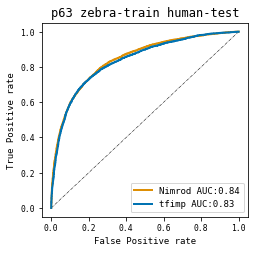

In [23]:
outname='tfigure_rocP63_nu_trans_dre'

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

myROC(nimrod_dr_cross, 'nimrod',color = colors[1])
myROC(tfimp_dr_cross, 'tfimp',color = colors[0])


plt.title('p63 zebra-train human-test')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
new_labels = [
              'Nimrod AUC:0.84',
              'tfimp AUC:0.83'
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

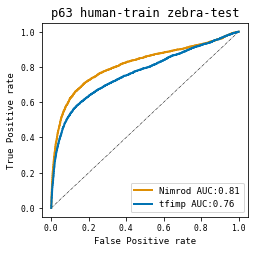

In [24]:
outname='tfigure_rocP63_nu_trans_hg'

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(nimrod_hg_cross,'nimrod',color = colors[1])
myROC(tfimp_hg_cross, 'tfimp',color = colors[0])

plt.title('p63 human-train zebra-test')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
new_labels = ['Nimrod AUC:0.81',
              'tfimp AUC:0.76',
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))